Examples from the book series visual quantum mechanics. by Bernd Thaller <br>
<br> 
Modified    By    Reason <br> 
--------    ---   ------ <br>
01-Aug-23   CBL   Original <br> 
10-Aug-23   CBL   Modified to use A complex to hsv converter. 
<hr> 
References: <br> 
https://vqm.uni-graz.at/ <br> 
https://matplotlib.org/stable/gallery/mplot3d/surface3d.html <br>
https://stackoverflow.com/questions/24897681/python-2d-color-map-with-imshow <br>
https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/pcolormesh_levels.html#sphx-glr-gallery-images-contours-and-fields-pcolormesh-levels-py <br>
https://www.tutorialspoint.com/how-to-plot-a-smooth-2d-color-plot-for-z-f-x-y-in-matplotlib <br>
https://stackoverflow.com/questions/37520251/plotting-hsv-values-with-imshow <br>
https://docs.python.org/3/library/colorsys.html<br>
https://matplotlib.org/stable/tutorials/colors/colormapnorms.html <br>
https://en.wikipedia.org/wiki/HSL_and_HSV#:~:text=The%20difference%20between%20HSL%20and,red%2C%20just%20brighter%20and%20more <br> 
This process has a name: "domain coloring", https://en.wikipedia.org/wiki/Domain_coloring <br> 
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import hsv_to_rgb
import colorsys as cs
import matplotlib.colors as mcolors

What I did not appreciate is that Visual Quantum Mechanics uses HLS Hue, Lightness, Saturation as compared
with HSV Hue, Saturation Value. In both instances Hue is described by an angle around a circle. Saturation is {0:100}% in both cases and is the magnitude of the vector representing the point on the 
circle. Value goes from {0 Black to 100% White}. HLS the Lightness is the {0Black to 1White} Which now that I write it seems the same. <br> 
https://support.ptc.com/help/mathcad/r9.0/en/index.html#page/PTC_Mathcad_Help/hls_and_hsv_color_representations.html
<hr>
In the book, poles = nan = white, zeros = 0 = black, lets implement this. 

Trying to create an HSV plot where: <br>
$z = x + jy $ <br>
A complex number z can be represented by its "absolute value" (or "modulus") $|z|$ and by its "argument" (or "phase") $arg(z)$. The absolute value is the distance of z from the origin in the complex plane, arg(z) is the angle between the line from (0,0) to (x,y) and the positive x-axis. The polar representation of z reads: <br>
$Z = |z|e^{i*arg(z)}$<br>

The color map uses the HLS color system ("hue-lightness-saturation"). The hue represents the argument arg(z) of the complex number z. The absolute value abs(z) is given by the lightness of the color. All colors of the color map have the maximal saturation (with respect to the given lightness).

In [58]:
def complex_to_rgb2(zz):
    """
    input a complex number and return an rgb value
    @param zz input complex value, assume a square matrix
    This is going to be fed into hsv_to_rgb which claims that each input is bound between 0:1
    This uses an HLS type of format which is in the book. HLS really only differs in that for HSV V{0:1}
    HLS -127:128 or -.5 to .5
    Normalizaton isn't quite right
    """
    norm   = mcolors.Normalize()
    norm2  = mcolors.PowerNorm(gamma=0.7)
    #norm2  = mcolors.LogNorm(gamma=0.9)
    #norm   = mcolors.CenteredNorm()
    #norm   = mcolors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=1.0, base=10)
    if (zz.ndim>1):
        n1 = zz.shape[0]
        n2 = zz.shape[1]
        n3 = 3
        rv = np.zeros([n1,n2,3])
        # this works better than angle and gives a better reproduction
        hue = np.arctan2(np.imag(zz),-np.real(zz))
        rv[:,:,0]  = norm(hue)
        saturation = np.absolute(zz)
        # Saturation is a tiny bit too linear, the lightness allows the plot to go to black. 
        rv[:,:,1]  = 1.0 # norm(saturation)
        #rv[:,:,1]  = saturation/np.max(saturation)
        # VALUE has to be a function as well to make this work. 
        rv[:,:,2] = norm(saturation) #1.0
        #rv[:,:,2]  = saturation/np.max(saturation)
        rgb = hsv_to_rgb(rv)
        
    return rgb

In [59]:
def G(x, y):
    s = x + 1j*y
    return s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3.00015304 2.93955014 2.87894736 2.81834473 2.75774225 2.69713993
 2.63653779 2.57593582 2.51533406 2.4547325  2.39413118 2.3335301
 2.27292928 2.21232876 2.15172854 2.09112867 2.03052916 1.96993006
 1.90933139 1.84873322 1.78813557 1.72753852 1.66694213 1.60634646
 1.54575161 1.48515767 1.42456476 1.36397302 1.30338262 1.24279374
 1.18220662 1.12162155 1.06103887 1.00045903 0.93988257 0.87931019
 0.81874279 0.75818158 0.69762815 0.63708473 0.57655447 0.51604201
 0.45555444 0.39510318 0.33470791 0.27440561 0.21427478 0.15451574
 0.0958266  0.04285496 0.04285496 0.0958266  0.15451574 0.21427478
 0.27440561 0.33470791 0.39510318 0.45555444 0.51604201 0.57655447
 0.63708473 0.69762815 0.75818158 0.81874279 0.87931019 0.93988257
 1.00045903 1.06103887 1.12162155 1.18220662 1.24279374 1.30338262
 1.36397302 1.42456476 1.48515767 1.54575161 1.60634646 1.66694213
 1.72753852 1.78813557 1.84873322 1.90933139 1.96993006 2.03052916
 2.09112867 2.15172854 2.21232876 2.27292928 2.3335301  2.39413

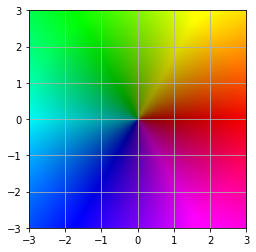

In [60]:
n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

xx, yy = np.meshgrid(x, y)
zz     = G(xx, yy)
i,j = np.where(zz.real==0)

rgb     = complex_to_rgb2(zz)
ij = np.where(rgb<0)
print(np.abs(zz[:,49]))
# plotting
plt.imshow(rgb, extent=[-3, 3, -3, 3])
plt.grid()
plt.show()

This matches the book.<br>
<img src="photo/colormap.jpg"> <br>
I don't quite get the black in the center. also, the intensity is greater near zero. 

In [105]:
# fool around with hsv to rgb
norm   = mcolors.Normalize()
x = 2
y = 2
angle = np.arctan2(y,-x)
hue   = norm(angle)
r = np.sqrt(np.power(x,2)+np.power(y,2))
saturation = r/100 #np.absolute(r)
value = 0
print("hue = " , hue, " saturation = ", saturation, " value = ", value)
rgb = cs.hsv_to_rgb(hue,saturation,value)
print("RGB : ", rgb)
print("RGB from HLS ", cs.hls_to_rgb(hue, value, saturation))

hue =  0.0  saturation =  0.0282842712474619  value =  0
RGB :  (0, 0.0, 0.0)
RGB from HLS  (0.0, 0.0, 0.0)
